## Mean and variance of groups generations

In [21]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [20]:
from get_probs_function import get_prob_and_loss


     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------  286.7/293.3 kB 8.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df = pd.concat( [ pd.read_csv(f"data_collected_{i}.csv") for i in ["red","blue"] ] )
df1 = df.copy()
for i in ['visit','click']:
    df1[i] = df1[i].astype(int)
df1 = df1.reset_index().rename( columns={'index':'day'} )
df1 = df1.pivot_table( index='day', columns='group', values=df1.select_dtypes(exclude='object').columns ,aggfunc='sum')
df1 = df1.swaplevel( axis=1 )
df1 = df1.reindex(sorted(df1.columns), axis=1).fillna(0)
df1.columns = ["_".join(i) for i in df1.columns]
for i in df1.columns:
    df1[f"acc_{i}"] = df1[i].cumsum()
df1 = df1.rename(columns={
    'control_click':"clicks_A",
    'treatment_click':"clicks_B",
    "control_visit":"visits_A",
    "treatment_visit":"visits_B",
    "acc_control_click":"acc_clicks_A",
    "acc_treatment_click":"acc_clicks_B",
    "acc_control_visit":"acc_visits_A",
    "acc_treatment_visit":"acc_visits_B"
})
data = df1.copy()



In [11]:
vals = {}
prob_b_better_a = []
expected_loss_a = []
expected_loss_b = []
sample_size=1000

In [15]:
day=150


for v in ["a", "b"]:
    vals[f"u_{v}"] , vals[f"var_{v}"] = stats.beta.stats( a = 1 + data.loc[day, f'acc_clicks_{v.upper()}'],
                                                          b = 1 + (data.loc[day, f'acc_visits_{v.upper()}'] - data.loc[day, f'acc_clicks_{v.upper()}']), moments='mv')
    
    print(vals[f"u_{v}"], vals[f"var_{v}"])

0.2987012987012987 0.0013514763410029434
0.35526315789473684 0.0014970669708326543


[0.31766059 0.29098257 0.31897672 0.24056549 0.24520959 0.34060884
 0.32605448 0.30481623 0.28131442 0.26542859 0.40242424 0.2599149
 0.29183134 0.32490153 0.26504388 0.32622301 0.25864845 0.36286394
 0.26337734 0.32319208 0.32926207 0.23496457 0.33848468 0.28789341
 0.33263367 0.36399761 0.29694621 0.25773825 0.31664733 0.26944492
 0.29173986 0.31621403 0.3361421  0.27514406 0.32359015 0.28546545
 0.24480757 0.29982992 0.286679   0.25152317 0.3619383  0.36959549
 0.29392602 0.32023191 0.28144348 0.24272757 0.29300833 0.30075282
 0.23846369 0.29514685 0.26518375 0.28936986 0.30659734 0.30718654
 0.29397274 0.28767013 0.28911473 0.26470336 0.31699637 0.37801763
 0.29475768 0.30401757 0.25901315 0.28113849 0.34457147 0.33931991
 0.28158071 0.27184302 0.24540914 0.36183328 0.28977083 0.29306922
 0.2711926  0.25702504 0.2866699  0.31933583 0.23169487 0.30817483
 0.32292318 0.2023097  0.29788007 0.29138709 0.27980895 0.3272692
 0.27713027 0.30656091 0.22278102 0.27949393 0.26542025 0.276041

<Axes: ylabel='Count'>

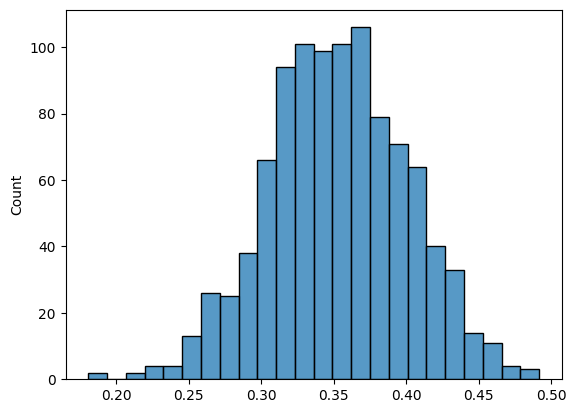

In [23]:
day=150


for v in ["a", "b"]:
    vals[f"u_{v}"] , vals[f"var_{v}"] = stats.beta.stats( a = 1 + data.loc[day, f'acc_clicks_{v.upper()}'],
                                                          b = 1 + (data.loc[day, f'acc_visits_{v.upper()}'] - data.loc[day, f'acc_clicks_{v.upper()}']), moments='mv')
    vals[f"x_{v}"] = np.random.normal( loc = vals[f"u_{v}"], scale = 1.25*np.sqrt( vals[f"var_{v}"] ) ,size = sample_size)
    
    print(vals[f"x_{v}"])


sns.histplot(vals[f"x_{v}"])

[15.55512186  1.63891766 11.82685669 ... 15.48043382  1.79755311
 15.6139819 ]
[14.2343865   1.33241829  2.78895048 ...  0.25447897  2.21149924
 10.91453959]


<Axes: ylabel='Count'>

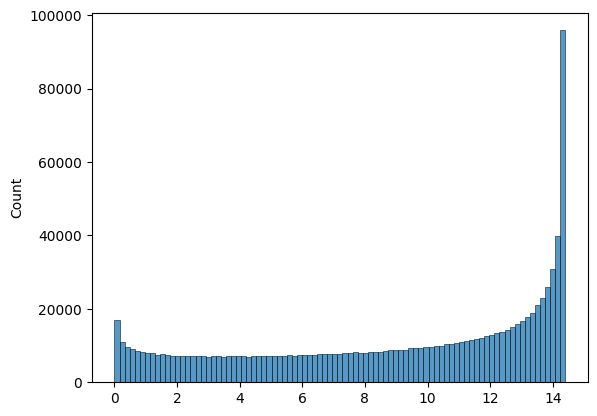

In [29]:
day=300
sample_size= 1000000

for v in ["a", "b"]:
    vals[f"u_{v}"] , vals[f"var_{v}"] = stats.beta.stats( a = 1 + data.loc[day, f'acc_clicks_{v.upper()}'],
                                                          b = 1 + (data.loc[day, f'acc_visits_{v.upper()}'] - data.loc[day, f'acc_clicks_{v.upper()}']), moments='mv')
    vals[f"x_{v}"] = np.random.normal( loc = vals[f"u_{v}"], scale = 1.25*np.sqrt( vals[f"var_{v}"] ) ,size = sample_size)

        #Generate Beta PDF
    vals[f"f{v}"] = stats.beta.pdf ( vals[f"x_{v}"], 
                    a = 1 + data.loc[day, f'acc_clicks_{v.upper()}'], 
                    b = 1 + (data.loc[day, f'acc_visits_{v.upper()}'] - data.loc[day, f'acc_clicks_{v.upper()}']) )
    
    print(vals[f"f{v}"])
sns.histplot(vals[f"f{v}"])

In [10]:
vals = {}
prob_b_better_a = []
expected_loss_a = []
expected_loss_b = []

sample_size=1000


for day in range( len ( data ) ):

    for v in ["a", "b"]:

        #Generate Beta distribution params
        vals[f"u_{v}"] , vals[f"var_{v}"] = stats.beta.stats( a = 1 + data.loc[day, f'acc_clicks_{v.upper()}'], \
                b = 1 + (data.loc[day, f'acc_visits_{v.upper()}'] - data.loc[day, f'acc_clicks_{v.upper()}']), moments='mv')


        
        #Generate Normal distribution
        vals[f"x_{v}"] = np.random.normal( loc = vals[f"u_{v}"], scale = 1.25*np.sqrt( vals[f"var_{v}"] ) ,size = sample_size)


        #Generate Beta PDF
        vals[f"f{v}"] = stats.beta.pdf ( vals[f"x_{v}"], 
                        a = 1 + data.loc[day, f'acc_clicks_{v.upper()}'], 
                        b = 1 + (data.loc[day, f'acc_visits_{v.upper()}'] - data.loc[day, f'acc_clicks_{v.upper()}']) )
        
        #Generate Normal PDF
        vals[f"g{v}"] = stats.norm.pdf( vals[f"x_{v}"], loc = vals[f"u_{v}"], scale = 1.25*np.sqrt( vals[f"var_{v}"] ) )


        # Beta / Normal
        y = ( vals['fa'] * vals['fb'] ) / ( vals['ga'] * vals['gb'] )
        yb = y[ vals['x_b'] >= vals['x_a'] ]
            
        #Calculate probabilities
        p = ( 1/ sample_size ) * np.sum(yb)


        expected_loss_A = (1 / sample_size ) * np.sum ( ( ( vals['x_b'] - vals['x_a'] )*y) [vals['x_b'] >= vals['x_a']] )
        expected_loss_B = (1 / sample_size ) * np.sum ( ( ( vals['x_a'] - vals['x_b'] )*y) [vals['x_a'] >= vals['x_b']] )

        prob_b_better_a.append(p)
        expected_loss_a.append( expected_loss_A )
        expected_loss_b.append( expected_loss_B )

        return prob_b_better_a, expected_loss_a, expected_loss_b

SyntaxError: 'return' outside function (680815150.py, line 52)

In [27]:
import numpy as np

class RandomAgent( object ):
    def __init__( self, prob_list ):
        self.prob_list = prob_list
    
    def pull( self, bandit_machine ):
        if np.random.random() < self.prob_list[ bandit_machine ]:
            reward = 1
        else:
            reward = 0

        return reward

In [28]:
prob_list = [ 0.3 , 0.8 ]
trials = 1000
episodes = 200

In [33]:
bandit = RandomAgent( prob_list )

prob_reward_array = np.zeros( len( prob_list ) )
accumulated_reward_array = list()
avg_accumulated_reward_array = list()

for episode in range( episodes ):
    reward_array = np.zeros( len( prob_list ) )
    bandit_array = np.full( len( prob_list ), 1.0e-5)
    accumulated_reward = 0

    for trial in range( trials ):
        bandit_machine = np.argmax( prob_list )
        reward = bandit.pull( bandit_machine )
        reward_array[ bandit_machine ] += reward
        bandit_array[ bandit_machine ] += 1
        accumulated_reward += reward

    prob_reward_array += reward_array / bandit_array
    accumulated_reward_array.append( accumulated_reward )
    avg_accumulated_reward_array.append( np.mean( accumulated_reward_array ) )

In [34]:


prob01 = 100*np.round( prob_reward_array[0] / episodes, 2)
prob02 = 100*np.round( prob_reward_array[1] / episodes, 2)

In [35]:
print( prob01, prob02)
print( np.mean( avg_accumulated_reward_array ) )

30.0 80.0
552.3675671315813
